In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import os
import nltk
import emoji
import demoji

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from wordcloud import WordCloud
from collections import Counter
from itertools import chain

import zipfile
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Tweet Preprocessing and EDA

In [2]:
zf = zipfile.ZipFile("./final_dataset.zip") 
df = pd.read_csv(zf.open("final_dataset.csv"))
df

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
30336,1,Full of fools.. ICC @ICCMediaComms @ICC @crick...
30337,1,"The US-Mexican border, where established moral..."
30338,1,@ICC All Eng matches are on dry pitches &amp; ...
30339,1,It seems the Rain &amp; thunder god only like ...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30341 entries, 0 to 30340
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   30341 non-null  int64 
 1   tweet   30341 non-null  object
dtypes: int64(1), object(1)
memory usage: 474.2+ KB


In [4]:
df["tweet"].nunique()

30277

In [5]:
df[df.duplicated()]

,class,tweet
24830,1,RT @WORLDSHIPHOP: RT if you still hate this ni...
24861,1,RT @TheBloodShow: I'm letting u know now. We n...
24862,1,RT @ParissaXo: i'm tired of u feminist bitches...
24888,1,RT @AnnCoulter: Const requires 2/3ds vote to o...
24900,1,RT @ParissaXo: i'm tired of u feminist bitches...
...,...,...
25389,1,RT @mckinlay_liz: Dear @GuyVerhofstadt please ...
25394,1,RT @cparham65: @ShermanTecumseh @SenateMajLdr ...
25396,1,RT @gabiekin_: I HATE PLAYERS DUDE YALL CAN GO...
30028,1,#ShameOnICC @ECB_cricket hahaha I pity on your...


In [6]:
df["tweet"].loc[[30160]]

30160    They heal, operate, diagnose  We consider them...
Name: tweet, dtype: object

In [7]:
df[df["tweet"] == "They heal, operate, diagnose  We consider them a part of the second God cosmos  This is so appalling, shameful and gross  We need to bring this violence to a close    #SaveBengal  #DoctorsFightBack  #standwithdoctors"]

,class,tweet
29908,1,"They heal, operate, diagnose We consider them..."
30160,1,"They heal, operate, diagnose We consider them..."


In [8]:
df = df.drop_duplicates(keep="last")

In [9]:
df[df["tweet"] == "They heal, operate, diagnose  We consider them a part of the second God cosmos  This is so appalling, shameful and gross  We need to bring this violence to a close    #SaveBengal  #DoctorsFightBack  #standwithdoctors"]

,class,tweet
30160,1,"They heal, operate, diagnose We consider them..."


In [10]:
df[df.duplicated()]

,class,tweet


In [11]:
df["class"].value_counts()

0    23353
1     6924
Name: class, dtype: int64

In [12]:
temp = df.groupby("class").count()["tweet"].reset_index().sort_values(by="tweet",ascending=False)
temp.style.background_gradient(cmap="Blues")

,class,tweet
0,0,23353
1,1,6924


<AxesSubplot:xlabel='count', ylabel='class'>

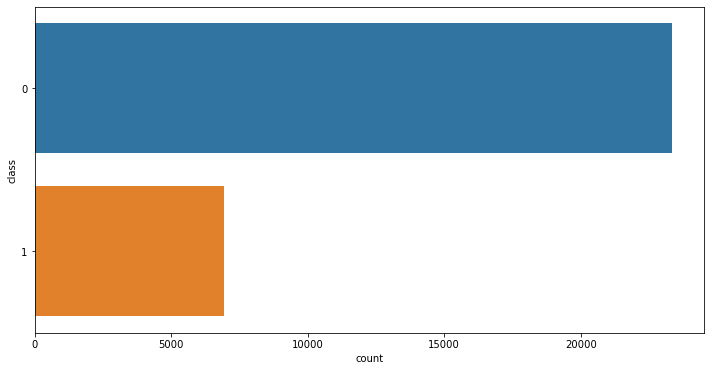

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(y="class", data=df)

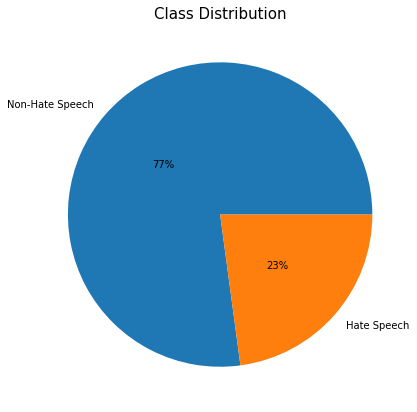

In [14]:
pie, ax = plt.subplots(figsize=[12,7])
labels = ["Non-Hate Speech","Hate Speech"]
plt.pie(df["class"].value_counts(), autopct="%.0f%%", labels=labels, pctdistance=0.5)
plt.title("Class Distribution", fontsize=15);

## Finding All Emojis

In [15]:
sentence_all = []
sentence_all.append(df["tweet"].to_string())

In [16]:
#All Emojis In Tweets
demoji.findall(sentence_all[0])

{'2️⃣': 'keycap: 2',
 '😄': 'grinning face with smiling eyes',
 '😐': 'neutral face',
 '💍': 'ring',
 '❤️': 'red heart',
 '😘': 'face blowing a kiss',
 '😭': 'loudly crying face',
 '🤔': 'thinking face',
 '🙆': 'person gesturing OK',
 '❤': 'red heart',
 '😅': 'grinning face with sweat',
 '😞': 'disappointed face',
 '🤣': 'rolling on the floor laughing',
 '📷': 'camera',
 '🗣': 'speaking head',
 '💲': 'heavy dollar sign',
 '🌎': 'globe showing Americas',
 '💔': 'broken heart',
 '💯': 'hundred points',
 '💥': 'collision',
 '🍫': 'chocolate bar',
 '🤷🏽': 'person shrugging: medium skin tone',
 '🇬🇧': 'flag: United Kingdom',
 '😡': 'pouting face',
 '😈': 'smiling face with horns',
 '😂': 'face with tears of joy',
 '🇯🇵': 'flag: Japan',
 '💨': 'dashing away',
 '😒': 'unamused face',
 '😳': 'flushed face',
 '👍🏽': 'thumbs up: medium skin tone',
 '💚': 'green heart',
 '🚘': 'oncoming automobile',
 '🔫': 'water pistol',
 '💜': 'purple heart',
 '😊': 'smiling face with smiling eyes',
 '❗': 'red exclamation mark',
 '🏃': 'person 

In [17]:
df_res = df[df["class"]==0]
df_res

,class,tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,0,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,0,"you've gone and broke the wrong heart baby, an..."
24780,0,young buck wanna eat!!.. dat nigguh like I ain...
24781,0,youu got wild bitches tellin you lies


In [18]:
df_res2 = df[df["class"]==1]
df_res2

,class,tweet
85,1,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,1,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,1,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,1,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,1,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
30336,1,Full of fools.. ICC @ICCMediaComms @ICC @crick...
30337,1,"The US-Mexican border, where established moral..."
30338,1,@ICC All Eng matches are on dry pitches &amp; ...
30339,1,It seems the Rain &amp; thunder god only like ...


In [19]:
#All Emojis in Non-Hate Tweets
sentence_nonHate = []
sentence_nonHate.append(df_res["tweet"].to_string())
demoji.findall(sentence_nonHate[0])

{}

In [20]:
#All Emojis in Hate Tweets
sentence_Hate = []
sentence_Hate.append(df_res2["tweet"].to_string())
demoji.findall(sentence_Hate[0])

{'2️⃣': 'keycap: 2',
 '😄': 'grinning face with smiling eyes',
 '😐': 'neutral face',
 '💍': 'ring',
 '❤️': 'red heart',
 '😘': 'face blowing a kiss',
 '😭': 'loudly crying face',
 '🤔': 'thinking face',
 '🙆': 'person gesturing OK',
 '❤': 'red heart',
 '😅': 'grinning face with sweat',
 '😞': 'disappointed face',
 '🤣': 'rolling on the floor laughing',
 '📷': 'camera',
 '🗣': 'speaking head',
 '💲': 'heavy dollar sign',
 '🌎': 'globe showing Americas',
 '💔': 'broken heart',
 '💯': 'hundred points',
 '💥': 'collision',
 '🍫': 'chocolate bar',
 '🤷🏽': 'person shrugging: medium skin tone',
 '🇬🇧': 'flag: United Kingdom',
 '😡': 'pouting face',
 '😈': 'smiling face with horns',
 '😂': 'face with tears of joy',
 '🇯🇵': 'flag: Japan',
 '💨': 'dashing away',
 '😒': 'unamused face',
 '😳': 'flushed face',
 '👍🏽': 'thumbs up: medium skin tone',
 '💚': 'green heart',
 '🚘': 'oncoming automobile',
 '🔫': 'water pistol',
 '💜': 'purple heart',
 '😊': 'smiling face with smiling eyes',
 '❗': 'red exclamation mark',
 '🏃': 'person 

## Cleaning Tweets

In [21]:
def clean_tweet(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers,remove special characters,remove RT,remove @words using RegEx'''
    text = str(text).lower()
    text = re.sub("@[\w]*", "", text)
    text = re.sub(r"\brt\b", "", text)
    text = re.sub("^A-Za-z0-9]+", "", text)   
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [22]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [23]:
#Finding Stopwords and Forms
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words("english")
stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gokay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
#Remove Stopwords and Short Words
def remove_stopwords(text):
    text = [word for word in text.split() if len(word)>2]
    return " ".join(text)

In [25]:
df["clean_tweet"] = df["tweet"]
df.head()

,class,tweet,clean_tweet
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [26]:
df["clean_tweet"] = df["clean_tweet"].apply(lambda x:clean_tweet(x))
df["clean_tweet"] = df["clean_tweet"].apply(lambda x:remove_stopwords(x))
df["clean_tweet"] = df["clean_tweet"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df["clean_tweet"] = df["clean_tweet"].apply(lambda x:remove_emojis(x))

In [27]:
#Tokenize Tweet
tokenized_tweet = df["clean_tweet"].apply(lambda x:x.split())
tokenized_tweet.head(30)

0     [woman, shouldnt, complain, cleaning, house, a...
1     [boy, dats, coldtyga, dwn, bad, cuffin, dat, h...
2     [dawg, ever, fuck, bitch, start, cry, confused...
3                                  [look, like, tranny]
4     [shit, hear, might, true, might, faker, bitch,...
5     [shit, blows, meclaim, faithful, somebody, sti...
6     [sit, hate, another, bitch, got, much, shit, g...
7          [cause, tired, big, bitches, coming, skinny]
8            [amp, might, get, bitch, back, amp, thats]
9           [hobbies, include, fighting, mariam, bitch]
10    [keeks, bitch, curves, everyone, lol, walked, ...
11                     [murda, gang, bitch, gang, land]
12                           [hoes, smoke, losers, yea]
13                          [bad, bitches, thing, like]
14                                         [bitch, get]
15                                 [bitch, nigga, miss]
16                               [bitch, plz, whatever]
17                                        [bitch

In [28]:
#Stem Tweet
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(word) for word in x])
tokenized_tweet.head(30)

0     [woman, shouldnt, complain, clean, hous, amp, ...
1     [boy, dat, coldtyga, dwn, bad, cuffin, dat, ho...
2     [dawg, ever, fuck, bitch, start, cri, confus, ...
3                                  [look, like, tranni]
4     [shit, hear, might, true, might, faker, bitch,...
5     [shit, blow, meclaim, faith, somebodi, still, ...
6        [sit, hate, anoth, bitch, got, much, shit, go]
7                [caus, tire, big, bitch, come, skinni]
8             [amp, might, get, bitch, back, amp, that]
9                 [hobbi, includ, fight, mariam, bitch]
10    [keek, bitch, curv, everyon, lol, walk, conver...
11                     [murda, gang, bitch, gang, land]
12                             [hoe, smoke, loser, yea]
13                            [bad, bitch, thing, like]
14                                         [bitch, get]
15                                 [bitch, nigga, miss]
16                                 [bitch, plz, whatev]
17                                        [bitch

In [29]:
df["clean_tweet_tokenized"] = tokenized_tweet

In [30]:
df["clean_tweet_detokenized"]=df["clean_tweet"].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [31]:
df.head(30)

,class,tweet,clean_tweet,clean_tweet_tokenized,clean_tweet_detokenized
0,0,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain cleaning house amp man...,"[woman, shouldnt, complain, clean, hous, amp, ...",w o m a n s h o u l d n t c o m p l a i n ...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dats coldtyga dwn bad cuffin dat hoe place,"[boy, dat, coldtyga, dwn, bad, cuffin, dat, ho...",b o y d a t s c o l d t y g a d w n b ...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cry confused shit,"[dawg, ever, fuck, bitch, start, cri, confus, ...",d a w g e v e r f u c k b i t c h s t ...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny,"[look, like, tranni]",l o o k l i k e t r a n n y
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told,"[shit, hear, might, true, might, faker, bitch,...",s h i t h e a r m i g h t t r u e m i ...
5,0,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: The shit just...",shit blows meclaim faithful somebody still fuc...,"[shit, blow, meclaim, faith, somebodi, still, ...",s h i t b l o w s m e c l a i m f a i t ...
6,0,"!!!!!!""@__BrighterDays: I can not just sit up ...",sit hate another bitch got much shit going,"[sit, hate, anoth, bitch, got, much, shit, go]",s i t h a t e a n o t h e r b i t c h ...
7,0,!!!!&#8220;@selfiequeenbri: cause I'm tired of...,cause tired big bitches coming skinny,"[caus, tire, big, bitch, come, skinni]",c a u s e t i r e d b i g b i t c h e s ...
8,0,""" &amp; you might not get ya bitch back &amp; ...",amp might get bitch back amp thats,"[amp, might, get, bitch, back, amp, that]",a m p m i g h t g e t b i t c h b a c ...
9,0,""" @rhythmixx_ :hobbies include: fighting Maria...",hobbies include fighting mariam bitch,"[hobbi, includ, fight, mariam, bitch]",h o b b i e s i n c l u d e f i g h t i n ...


## Finding Hashtags on Tweets

In [32]:
def hash_tags(text):
    return text.apply(lambda x: re.findall(r"(#[A-Za-z]+[A-Za-z0-9-_]+)", str(x)))

In [33]:
df_hashtag = hash_tags(df["tweet"])
df_hashtag

0                                                       []
1                                                       []
2                                                       []
3                                                       []
4                                                       []
                               ...                        
30336                                        [#ShameOnICC]
30337                                   [#TrumpIsATraitor]
30338                                        [#ShameOnICC]
30339                                        [#ShameOnICC]
30340    [#Muslim, #Rapist, #innocent, #Girls, #Idiots,...
Name: tweet, Length: 30277, dtype: object

In [34]:
df_hashtag = pd.DataFrame(df_hashtag)
df_hashtag = df_hashtag.rename(columns={"tweet": "hashtags"})
df_hashtag

,hashtags
0,[]
1,[]
2,[]
3,[]
4,[]
...,...
30336,[#ShameOnICC]
30337,[#TrumpIsATraitor]
30338,[#ShameOnICC]
30339,[#ShameOnICC]


In [35]:
#Remove Empty List Hashtags
hashtag_lst = []
for items in df_hashtag["hashtags"]:
    if (items != []):
        hashtag_lst.append(items)
hashtag_lst

[['#Shots'],
 ['#SevenOne'],
 ['#HappyHumpDay'],
 ['#ahmesehwetness'],
 ['#Eaglesnation', '#Eagles'],
 ['#EarlyChristmas'],
 ['#StopWhitePeople2014'],
 ['#CowboysNation'],
 ['#TehGodClan'],
 ['#Yankees'],
 ['#FreeMoneyMelle'],
 ['#oomf'],
 ['#scally', '#chav', '#sockfetish', '#stinking'],
 ['#fixed'],
 ['#KingOfTheHill'],
 ['#UCFPINKPARTY', '#ComeAtMeUT'],
 ['#bum'],
 ['#Climate'],
 ['#WutKinda'],
 ['#hoesaintloyal'],
 ['#real'],
 ['#Pisces'],
 ['#NewSATQuestions'],
 ['#GerrysHalloweenParty'],
 ['#MTVHottest'],
 ['#Yankees', '#RALLYCAP'],
 ['#redneck'],
 ['#ProtectTheAnimals'],
 ['#Damn', '#GodProtectsHisAngels'],
 ['#blondeproblems'],
 ['#scally', '#sneakersex', '#sockfetish', '#sniff', '#trainersex'],
 ['#History', '#Photography'],
 ['#WWYD'],
 ['#frenchscally'],
 ['#YoureNotMyType'],
 ['#chav'],
 ['#shitmybosssays'],
 ['#shitallysays'],
 ['#FreshRhymes', '#JerkSquad', '#SlowStir'],
 ['#JT2020Tour'],
 ['#beforeiselfdestruct'],
 ['#ThankYouPaulForConfirmingLarry'],
 ['#NottingHill'],


In [36]:
flatten_hashtag_lst = list(chain.from_iterable(hashtag_lst))
flatten_hashtag_lst

['#Shots',
 '#SevenOne',
 '#HappyHumpDay',
 '#ahmesehwetness',
 '#Eaglesnation',
 '#Eagles',
 '#EarlyChristmas',
 '#StopWhitePeople2014',
 '#CowboysNation',
 '#TehGodClan',
 '#Yankees',
 '#FreeMoneyMelle',
 '#oomf',
 '#scally',
 '#chav',
 '#sockfetish',
 '#stinking',
 '#fixed',
 '#KingOfTheHill',
 '#UCFPINKPARTY',
 '#ComeAtMeUT',
 '#bum',
 '#Climate',
 '#WutKinda',
 '#hoesaintloyal',
 '#real',
 '#Pisces',
 '#NewSATQuestions',
 '#GerrysHalloweenParty',
 '#MTVHottest',
 '#Yankees',
 '#RALLYCAP',
 '#redneck',
 '#ProtectTheAnimals',
 '#Damn',
 '#GodProtectsHisAngels',
 '#blondeproblems',
 '#scally',
 '#sneakersex',
 '#sockfetish',
 '#sniff',
 '#trainersex',
 '#History',
 '#Photography',
 '#WWYD',
 '#frenchscally',
 '#YoureNotMyType',
 '#chav',
 '#shitmybosssays',
 '#shitallysays',
 '#FreshRhymes',
 '#JerkSquad',
 '#SlowStir',
 '#JT2020Tour',
 '#beforeiselfdestruct',
 '#ThankYouPaulForConfirmingLarry',
 '#NottingHill',
 '#RIPTALLT',
 '#Tupac',
 '#smile',
 '#remix',
 '#afterearth',
 '#SNL',


## Hashtag Distribution of Tweets

In [37]:
count = Counter(flatten_hashtag_lst)
count

Counter({'#Shots': 1,
         '#SevenOne': 1,
         '#HappyHumpDay': 1,
         '#ahmesehwetness': 1,
         '#Eaglesnation': 1,
         '#Eagles': 3,
         '#EarlyChristmas': 1,
         '#StopWhitePeople2014': 1,
         '#CowboysNation': 1,
         '#TehGodClan': 1,
         '#Yankees': 94,
         '#FreeMoneyMelle': 1,
         '#oomf': 4,
         '#scally': 2,
         '#chav': 2,
         '#sockfetish': 2,
         '#stinking': 1,
         '#fixed': 1,
         '#KingOfTheHill': 1,
         '#UCFPINKPARTY': 1,
         '#ComeAtMeUT': 1,
         '#bum': 1,
         '#Climate': 2,
         '#WutKinda': 1,
         '#hoesaintloyal': 1,
         '#real': 3,
         '#Pisces': 1,
         '#NewSATQuestions': 1,
         '#GerrysHalloweenParty': 1,
         '#MTVHottest': 1,
         '#RALLYCAP': 1,
         '#redneck': 5,
         '#ProtectTheAnimals': 1,
         '#Damn': 1,
         '#GodProtectsHisAngels': 1,
         '#blondeproblems': 1,
         '#sneakersex': 1

In [39]:
#Top 20 Hashtags
most_hashtags = pd.DataFrame(count.most_common(20))
most_hashtags.columns = ["most_hashtags","count"]
most_hashtags.style.background_gradient(cmap="Blues")

,most_hashtags,count
0,#MKR,324
1,#mkr,314
2,#TrumpIsATraitor,204
3,#ShameOnICC,149
4,#notsexist,124
5,#DoctorsFightBack,110
6,#BorisJohnsonShouldNotBePM,109
7,#DhoniKeepsTheGlove,100
8,#Yankees,94
9,#NotSexist,66


## Word Count of Tweets

In [40]:
def word_count(text):
    return text.apply(lambda x: len(str(x).split(" ")))

In [41]:
df_word_count = word_count(df["tweet"])

In [42]:
df_word_count = pd.DataFrame(df_word_count)
df_word_count

,tweet
0,25
1,16
2,21
3,9
4,26
...,...
30336,9
30337,39
30338,51
30339,22


In [43]:
df_word_count = df_word_count.join(df["class"])
df_word_count = df_word_count.rename(columns={"tweet": "word_count"})
df_word_count

,word_count,class
0,25,0
1,16,0
2,21,0
3,9,0
4,26,0
...,...,...
30336,9,1
30337,39,1
30338,51,1
30339,22,1


## Most Common Words

In [44]:
non_hate_sent = df[df["class"]==0]
hate_sent = df[df["class"]==1]

## Common Non-Hate Speech Words

In [45]:
common_words = Counter([item for lst in non_hate_sent['clean_tweet_tokenized'] for item in lst])
commonw = pd.DataFrame(common_words.most_common(20))
commonw.columns = ['Common_words','count']
commonw.style.background_gradient(cmap='Blues')

,Common_words,count
0,bitch,10918
1,hoe,4102
2,like,2671
3,pussi,2128
4,fuck,2017
5,nigga,1765
6,get,1693
7,dont,1656
8,ass,1441
9,got,1250


## Common Hate Speech Words

In [46]:
common_words2 = Counter([item for lst in hate_sent['clean_tweet_tokenized'] for item in lst])
commonw2 = pd.DataFrame(common_words2.most_common(20))
commonw2.columns = ['Common_words','count']
commonw2.style.background_gradient(cmap='Reds')

,Common_words,count
0,sexist,870
1,mkr,616
2,like,589
3,women,516
4,dont,484
5,get,432
6,fuck,430
7,nigga,428
8,hate,391
9,bitch,390


## WordClouds

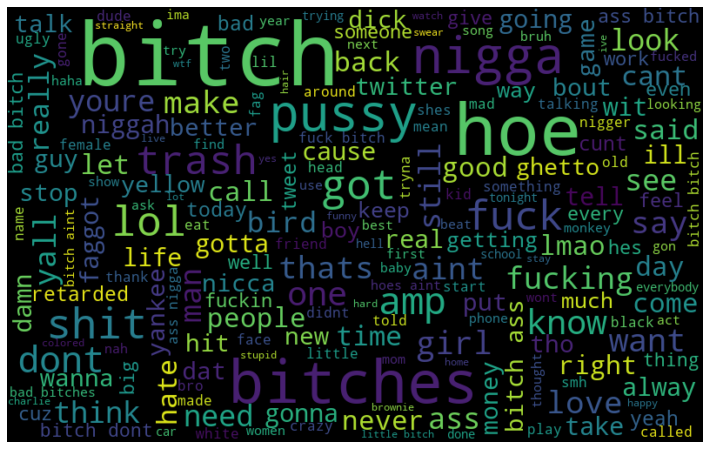

In [49]:
#Non-Hate Speech WordCloud
all_words = " ".join([sentence for sentence in df["clean_tweet"][df["class"]==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

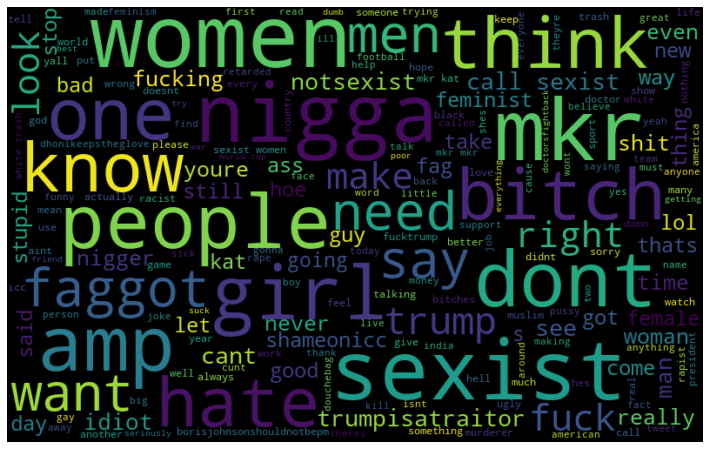

In [50]:
#Hate Speech WordCloud
all_words = " ".join([sentence for sentence in df["clean_tweet"][df["class"]==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()